In [1]:
import psycopg2 as pg

In [8]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt

%matplotlib inline

In [9]:
conda install psycopg2

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
from sqlalchemy import create_engine

In [11]:
# Postgres username, password, and database name
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = ''
POSTGRES_ADDRESS = 'localhost'
POSTGRES_DBNAME  = 'consume'

In [12]:
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username=POSTGRES_USERNAME,
        password=POSTGRES_PASSWORD,
        ipaddress=POSTGRES_ADDRESS,
        port=POSTGRES_PORT,
        dbname=POSTGRES_DBNAME))

In [13]:
# Create the connection
cnx = create_engine(postgres_str)

In [14]:
country_data= pd.read_sql_query('''SELECT * FROM loans;''',cnx) 
country_data.head()

,id,end_of_period,loan_number,country_code,country,borrower,guarantor_country_code,guarantor,loan_status,currency_of_commitment,...,agreement_signing_date,board_approval_date,effective_date,closed_date,last_disbursement_date,loan_type,region,interest_rate,project_id,repaid_to_ibrd
0,169195,2014-07-31T00:00:00.000,IBRD14995,ID,Indonesia,Ministry of Finance,ID,Indonesia,Repaid,None,...,1981-03-30T00:00:00.000,1977-11-15T00:00:00.000,1981-05-20T00:00:00.000,1984-06-30T00:00:00.000,None,POOL LOAN,East Asia and Pacific,7.9,P003771,33722906.15
1,169196,2014-08-31T00:00:00.000,IBRD14995,ID,Indonesia,Ministry of Finance,ID,Indonesia,Repaid,None,...,1981-03-30T00:00:00.000,1977-11-15T00:00:00.000,1981-05-20T00:00:00.000,1984-06-30T00:00:00.000,None,POOL LOAN,East Asia and Pacific,7.9,P003771,33722906.15
2,169197,2014-09-30T00:00:00.000,IBRD14995,ID,Indonesia,Ministry of Finance,ID,Indonesia,Repaid,None,...,1981-03-30T00:00:00.000,1977-11-15T00:00:00.000,1981-05-20T00:00:00.000,1984-06-30T00:00:00.000,None,POOL LOAN,East Asia and Pacific,7.9,P003771,33722906.15
3,169198,2014-10-31T00:00:00.000,IBRD14995,ID,Indonesia,Ministry of Finance,ID,Indonesia,Repaid,None,...,1981-03-30T00:00:00.000,1977-11-15T00:00:00.000,1981-05-20T00:00:00.000,1984-06-30T00:00:00.000,None,POOL LOAN,East Asia and Pacific,7.9,P003771,33722906.15
4,169199,2014-11-30T00:00:00.000,IBRD14995,ID,Indonesia,Ministry of Finance,ID,Indonesia,Repaid,None,...,1981-03-30T00:00:00.000,1977-11-15T00:00:00.000,1981-05-20T00:00:00.000,1984-06-30T00:00:00.000,None,POOL LOAN,East Asia and Pacific,7.9,P003771,33722906.15


In [15]:
country_loan_status = pd.read_sql_query("""SELECT country as country, country_code as code, loan_status as status, interest_rate as interest, closed_date as date FROM loans""", cnx)
country_loan_status.head()

,country,code,status,interest,date
0,Indonesia,ID,Repaid,7.9,1984-06-30T00:00:00.000
1,Indonesia,ID,Repaid,7.9,1984-06-30T00:00:00.000
2,Indonesia,ID,Repaid,7.9,1984-06-30T00:00:00.000
3,Indonesia,ID,Repaid,7.9,1984-06-30T00:00:00.000
4,Indonesia,ID,Repaid,7.9,1984-06-30T00:00:00.000


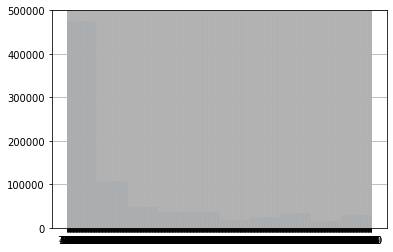

In [16]:
country_loan_status.interest.hist()

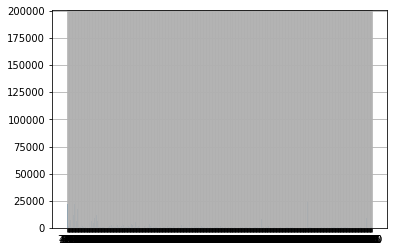

In [17]:
country_loan_status.interest.hist(bins=500)

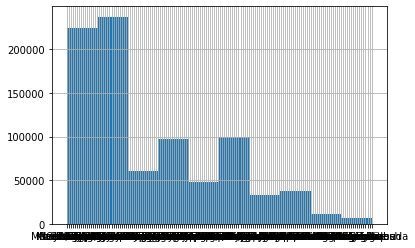

In [18]:
country_loan_status.country.hist()

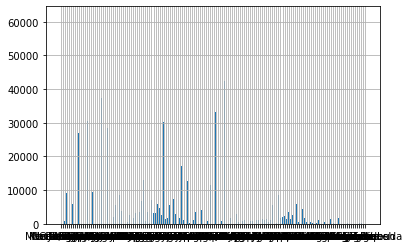

In [19]:
country_loan_status.country.hist(bins=500)